# temporary 

Created to run some python codes to analyze simulation results.

In [1]:
import json
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_context('paper')

In [2]:
cells = ['sPY', 'sIN', 'sPYbr', 'sPYb', 'sPYr']

In [3]:
import json
datas = {}

for cell in cells:
    # Opening JSON file
    f = open(f'../data/Pospischil2008_{cell}_data.json')
    # returns JSON object as 
    # a dictionary
    data_cell = json.load(f)
    datas[cell] = data_cell
    f.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


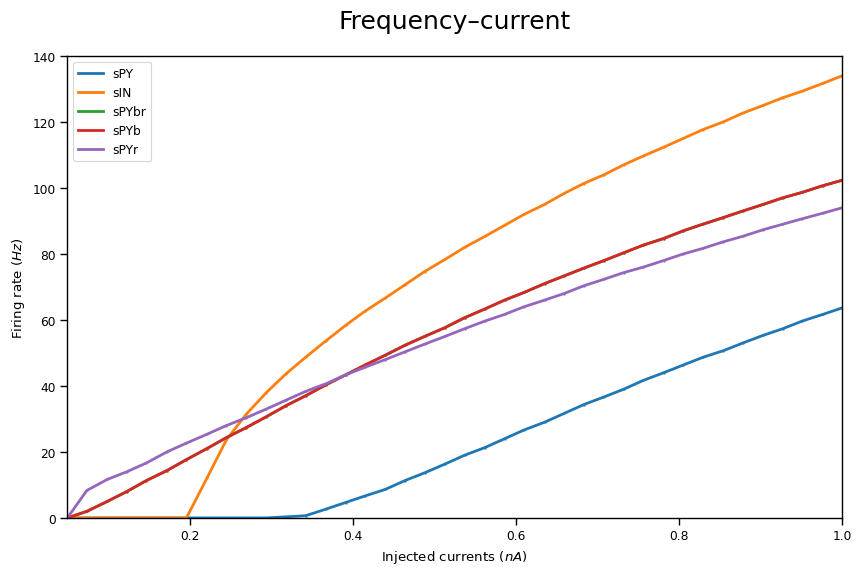

In [7]:
stims = np.linspace(0.05,1.0,40).round(3)

plt.figure(figsize=(10,6))
for key in datas.keys():
    rates = list(datas[key]['simData']['popRates'].values())
    sns.lineplot(x = stims, y = rates, linewidth=2, label=key)
    sns.scatterplot(x = stims, y = rates, s=3)

plt.title(r'Frequency–current', fontsize=18, pad=20)
plt.xlabel(r'Injected currents ($nA$)')
plt.ylabel(r'Firing rate ($Hz$)')
plt.xlim(0.05, 1)
plt.ylim(0.0, 140)
plt.savefig(fname='../figures/Frequency–current.eps')
plt.show()